# Single Qubit Gates

Single Qubit Gates can transform any qubit to a new quantum state, the same can visualised as a rotation on the bloch sphere of the initial state to a new state.

We know that a quantum system can be represented as a qubit using the Dirac Notation (Bra-Ket Notation), which essentially means that the qubit can be represented as a ket (2 element column matrix) or a bra (2 element row matrix).

So to transform a quantum state to another, we need to multiply a matrix to our initial state and that's what application of a single qubit gate does. 

Single qubit gates are 2X2 matrices which when applied or multiplied to the initial statevector, then we get a new transformed statevector.

If we have more than one qubit, then size of the statevector and the Gate changes (Details on this in Multi Qubit Gate section)

In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi

## Pauli X Gate

<center><b>Pauli X Gate</b></center>
<center><b>180 degree rotation about x axis, also known as quantum bit flip gate</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> X Gate matrix</b></center>
$$X =\begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}$$
<br/>
<center><b>State Transformation</b></center>
$$X\ket{0} = \ket{1}$$
$$X\ket{1} = \ket{0}$$
<br/>
<center><b>Applying X gate on |0></b></center>
$$X\ket{0} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{0} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$X\ket{0} = \ket{1}$$
<br/>
<center><b>Applying X gate on |1></b></center>
$$X\ket{1} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$X\ket{1} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{1} = \ket{0}$$
<br/>
<center><b>Quantum Bit Flip</b></center>
$$X\ket{0} = \ket{1}$$
$$X\ket{1} = \ket{0}$$
<br/>

![SegmentLocal](bloch_transformations/x_gate.gif "segment")

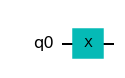

In [2]:
# x gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.x(q)
display(qc.draw(output="mpl"))

In [3]:
# executing the circuit

# using statevector simulator as backend
backend = Aer.get_backend('statevector_simulator')
# using unitary simulator as backend 
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

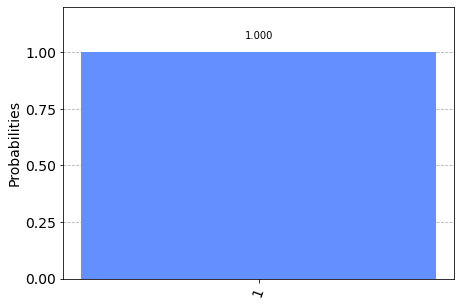

In [4]:
# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by example

#### Example 1
<center><b>Applying X gate on |0></b></center>
$$X\ket{0} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{0} = \begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$X\ket{0} = \ket{1}$$
<br/>

In [5]:
# initial state is |0>
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("|0> \n{}\n".format(zero_state))

# Method 1: get_unitary
# get_unitary returns the final matrix of the quantum circuit,
# that is applied on the initial state to get the output state

x_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
x_gate = np.matrix(x_gate)
print("Pauli X Gate \nMethod 1: get_unitary function\n{}\n".format(x_gate))

# Method 2: Operator

from qiskit.quantum_info import Operator
x_gate_2 = Operator(qc)
print('Method 2: Operator Function \n{}\n'.format(x_gate_2.data))

# application of circuit matrix on the initial state to get the output state
output = x_gate*zero_state
print("Applying Pauli X gate on 0 ket gives \n{}\n which is equal to |1>".format(output))

|0> 
[[1.+0.j]
 [0.+0.j]]

Pauli X Gate 
Method 1: get_unitary function
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Method 2: Operator Function 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Applying Pauli X gate on 0 ket gives 
[[0.+0.j]
 [1.+0.j]]
 which is equal to |1>


In [6]:
# printing the abovementioned matrices as latex
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("|0>")
display(visualization.array_to_latex(zero_state))

x_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
x_gate = np.matrix(x_gate)
print("Pauli X Gate ")
display(visualization.array_to_latex(x_gate))

output = x_gate*zero_state
print("Applying Pauli X gate on 0 ket gives")
display(visualization.array_to_latex(output))
print("which is equal to |1>")

|0>


<IPython.core.display.Latex object>

Pauli X Gate 


<IPython.core.display.Latex object>

Applying Pauli X gate on 0 ket gives


<IPython.core.display.Latex object>

which is equal to |1>


#### Example 2
<center><b>Applying X gate on |1></b></center>
$$X\ket{1} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$X\ket{1} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{1} = \ket{0}$$
<br/>

In [7]:
one_state = np.matrix([[0.+0.j],[1.+0.j]])
print("|1> \n{}\n".format(one_state))

x_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
x_gate = np.matrix(x_gate)
print("Pauli X Gate \n{}\n".format(x_gate))

output = x_gate*one_state
print("Applying Pauli X gate on 1 ket gives \n{}\n which is equal to |0>".format(output))

|1> 
[[0.+0.j]
 [1.+0.j]]

Pauli X Gate 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Applying Pauli X gate on 1 ket gives 
[[1.+0.j]
 [0.+0.j]]
 which is equal to |0>


#### Two properties that most of the Gates follow are:
#### 1. Hermitian
#### 2. Unitary

<br>
<center><b>1. Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$X^\dagger =\begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}$$

$$X = X^\dagger$$
<center><b>X gate is Hermitian</b></center>
<br/>
<center><b>2. Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$XX^\dagger = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}$$

$$XX^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$XX^\dagger = I$$

<center><b>X gate is Unitary</b></center>

$$X^\dagger=X^{-1}$$
$$We\space know,\space X = X^\dagger$$
<center><b>So X is inverse of itself</b></center>

#### Hermitian Check

In [8]:
def check_hermitian(gate):
    conjugate_transpose = gate.H
    if (gate == conjugate_transpose).all():
        print("It is Hermitian")
    else:
        print("It is not Hermitian")
check_hermitian(x_gate)

It is Hermitian


#### Unitary Check

In [9]:
def check_unitary(gate):
    conjugate_transpose = gate.H
    if (gate*conjugate_transpose == np.identity(len(gate))).all():
        print("It is Unitary")
    else:
        print("It is not Unitary")
check_unitary(x_gate)

It is Unitary


<center><b>Deriving the X gate matrix from Intuition</b></center>

If we know the eigenvetors and eigenvalues of a matrix then it is fairly simple to find the corresponding matrix.

We want to derive the matrix of X gate by its definition and how it is expected to rotate qubit states.Intuitively speaking, we can find X operation's eigenvetors by taking into account those points that do not rotate (or change their position) on applying a 180 degree rotation about the X axis. We can rightly imagine the qubits represented by positive and negative x directions on the bloch sphere as its eigenvectors, as they are not affected by a rotation about the x axis, because they are parallel and cinciding to the x axis. So $\ket{+}$ and $\ket{-}$ are the eigenvectors of X operation, without even knowing the X matrix.

We can verify this mathematically by calculating the eigenvectors and eigenvalues of X gate mathematically, just to verify the intuitive result. 

$$X\ket{+} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ \frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}}  \\ \frac{1}{\sqrt{2}} \end{bmatrix} $$

$$X\ket{+} = \ket{+}$$

$$X\ket{-} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix}- \frac{1}{\sqrt{2}}  \\ \frac{1}{\sqrt{2}} \end{bmatrix} = -\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ -\frac{1}{\sqrt{2}} \end{bmatrix} $$

$$X\ket{-} = -\ket{-}$$
| Eigenstate | Eigenvalue |
| :- | -: |
| $\ket{+}$ | +1 |
| $\ket{-}$ | -1 |
<center><b>So $\ket{+}$ is eigenstate and 1 is eigenvale of Matrix X</b></center>
<center><b>So $\ket{-}$ is eigenstate and -1 is eigenvale of Matrix X</b></center>
<br />
So now that we know the eigenvectors and corresponding eigenvalues of X operation it is easy to find the X matrix, via the expression formed below and its simplification.
$$X\ket{+} = \ket{+}$$
$$X = \ket{+}\bra{+}$$

$$X\ket{-} = -\ket{-}$$
$$X = -\ket{-}\bra{-}$$

$$X = \ket{+}\bra{+}\space -\space\ket{-}\bra{-}$$ 
<br />
<center><b>Replacing by the following equations</b></center>
$$\ket{+} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$
$$\bra{+} = \frac{1}{\sqrt{2}}(\bra{0} + \bra{1})$$
$$\ket{-} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$
$$\bra{-} = \frac{1}{\sqrt{2}}(\bra{0} - \bra{1})$$
<br />
<center><b>On simplifying we get</b></center>
<br />
$$X = \ket{0}\bra{1} + \ket{1}\bra{0}$$

$$X = \begin{bmatrix} 1 \\  0\end{bmatrix} \begin{bmatrix} 0 & 1\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix} \begin{bmatrix} 1 & 0\end{bmatrix} $$

$$X = \begin{bmatrix} 0 & 1 \\ 0 & 0\end{bmatrix} + \begin{bmatrix} 0 & 0\\ 1 & 0\end{bmatrix}$$

$$X =\begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix} $$
<br/>

Therefore, we have established the X gate matrix from its definition just as it is expected to be

## Pauli Z Gate

<center><b>Pauli Z Gate</b></center>
<center><b>180 degree rotation about z axis, also known as quantum phase flip gate</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> Z Gate matrix</b></center>
$$Z =\begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}$$
<br/>
<center><b>State Transformation</b></center>
$$Z\ket{+} = \ket{-}$$
$$Z\ket{-} = \ket{+}$$
<br/>
<center><b>Applying Z gate on $\ket{+}$</b></center>
$$Z\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \ket{-}$$
<br/>
<center><b>Applying Z gate on $\ket{-}$</b></center>
$$Z\ket{-} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{-} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{-} = \ket{+}$$
<br/>
<center><b>Quantum Phase Flip</b></center>
$$Z\ket{+} = \ket{-}$$
$$Z\ket{-} = \ket{+}$$
<br/>

![SegmentLocal](bloch_transformations/z_gate.gif "segment")

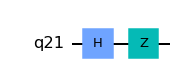

In [10]:
# z gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
qc.z(q)
display(qc.draw(output="mpl"))

In [11]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

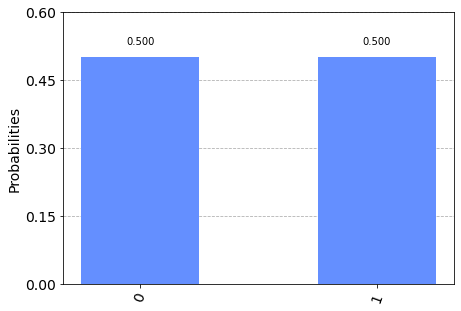

In [12]:
# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by Example

#### Example 1
<center><b>Applying Z gate on $\ket{+}$</b></center>
$$Z\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \ket{-}$$
<br/>

In [13]:
plus_state = np.matrix([[ 0.707+0.j],[ 0.707+0.j]])
print("|+> \n{}\n".format(plus_state))

z_gate = np.matrix([[1,0],[0,-1]])
print("Pauli Z Gate \n{}\n".format(z_gate))

output = z_gate*plus_state
print("Applying Pauli Z gate on + ket gives \n{}\n which is equal to |->".format(output))

|+> 
[[0.707+0.j]
 [0.707+0.j]]

Pauli Z Gate 
[[ 1  0]
 [ 0 -1]]

Applying Pauli Z gate on + ket gives 
[[ 0.707+0.j]
 [-0.707+0.j]]
 which is equal to |->


In [14]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("|0> \n{}\n".format(zero_state))

hz_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
hz_gate = np.matrix(hz_gate)
print("H and Pauli Z Gate \n{}\n".format(hz_gate))

output = hz_gate*zero_state
print("Applying H and Pauli Z gate on 0 ket gives \n{}\n which is equal to |->".format(output))

|0> 
[[1.+0.j]
 [0.+0.j]]

H and Pauli Z Gate 
[[ 0.707+0.j  0.707+0.j]
 [-0.707-0.j  0.707+0.j]]

Applying H and Pauli Z gate on 0 ket gives 
[[ 0.707+0.j]
 [-0.707+0.j]]
 which is equal to |->


<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$Z^\dagger =\begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}$$

$$Z = Z^\dagger$$
<center><b>Z gate is Hermitian</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$ZZ^\dagger = \begin{bmatrix}1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}$$

$$ZZ^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$ZZ^\dagger = I$$

<center><b>Z gate is Unitary</b></center>

$$Z^\dagger=Z^{-1}$$
$$We\space know,\space Z = Z^\dagger$$
<center><b>So Z is inverse of itself</b></center>

#### Hermitian and Unitary check

In [15]:
check_hermitian(z_gate)
check_unitary(z_gate)

It is Hermitian
It is Unitary


We can derive the Z gate from its definition by the same logic applied for the X gate. We have omitted the logic over here and just shown the mathematics to find the Z gate
<center><b>Derivation from Result</b></center>
$$Z\ket{0} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 1  \\ 0 \end{bmatrix} = \begin{bmatrix} 1  \\ 0 \end{bmatrix} $$

$$Z\ket{0} = \ket{0}$$

$$Z\ket{1} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 0  \\ 1 \end{bmatrix} = \begin{bmatrix} 0  \\ -1 \end{bmatrix} = -\begin{bmatrix} 0  \\ 1 \end{bmatrix} $$

$$Z\ket{1} = -\ket{1}$$
| Eigenstate | Eigenvalue |
| :- | -: |
| $\ket{0}$ | +1 |
| $\ket{1}$ | -1 |
<center><b>So $\ket{0}$ is eigenstate and 1 is eigenvale of Matrix Z</b></center>
<center><b>So $\ket{1}$ is eigenstate and -1 is eigenvale of Matrix Z</b></center>
<br />
$$Z\ket{0} = \ket{0}$$
$$Z = \ket{0}\bra{0}$$

$$Z\ket{1} = -\ket{1}$$
$$Z = -\ket{1}\bra{1}$$

$$Z = \ket{0}\bra{0} - \ket{1}\bra{1}$$

$$Z = \begin{bmatrix} 1 \\  0\end{bmatrix} \begin{bmatrix} 1 & 0\end{bmatrix} - \begin{bmatrix} 0 \\ 1\end{bmatrix} \begin{bmatrix} 0 & 1\end{bmatrix} $$

$$Z = \begin{bmatrix} 1 & 0 \\ 0 & 0\end{bmatrix} - \begin{bmatrix} 0 & 0\\ 0 & 1\end{bmatrix}$$

$$Z =\begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix} $$
<br/>

## Pauli Y Gate

<center><b>Pauli Y Gate</center></b>
<center><b>180 degree rotation about y axis, also known as quantum bit and phase flip gate</center></b>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> Y Gate matrix</b></center>
$$Y =\begin{bmatrix} 0 & -i   \\ i & 0 \end{bmatrix}$$
<br/>
<center><b>State Transformation</b></center>
$$X\ket{0} = i\ket{1}$$
$$X\ket{1} = -i\ket{0}$$
<br/>
<center><b>Applying Y gate on |0></b></center>
$$Y\ket{0} = \begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Y\ket{0} = i\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Y\ket{0} = i\ket{1}$$
<br/>
<center><b>Applying Y gate on |1></b></center>
$$Y\ket{1} = \begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Y\ket{1} = -i\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{1} = -i\ket{0}$$
<br/>
<center><b>Quantum Bit Phase Flip</b></center>
$$X\ket{0} = i\ket{1}$$
$$X\ket{1} = -i\ket{0}$$
<br/>

![SegmentLocal](bloch_transformations/y_gate.gif "segment")

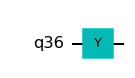

In [16]:
# z gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.y(q)
display(qc.draw(output="mpl"))

In [17]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

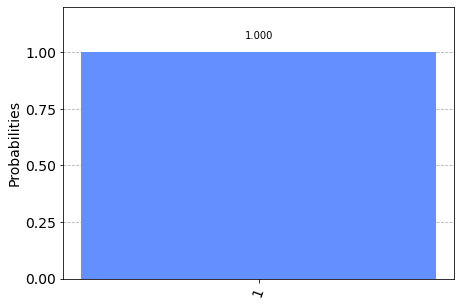

In [18]:
# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by Example

#### Example 1
<center><b>Applying Y gate on |0></b></center>
$$Y\ket{0} = \begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$Y\ket{0} = i\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Y\ket{0} = i\ket{1}$$
<br/>

In [19]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("|0> \n{}\n".format(zero_state))

y_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
y_gate = np.matrix(y_gate)
print("Pauli Y Gate \n{}\n".format(y_gate))

output = y_gate*zero_state
print("Applying Pauli Y gate on 0 ket gives \n{}\n which is equal to i|1>".format(output))

|0> 
[[1.+0.j]
 [0.+0.j]]

Pauli Y Gate 
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Applying Pauli Y gate on 0 ket gives 
[[0.+0.j]
 [0.+1.j]]
 which is equal to i|1>


#### Example 2 
<center><b>Applying Y gate on |1></b></center>
$$Y\ket{1} = \begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$Y\ket{1} = -i\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$X\ket{1} = -i\ket{0}$$
<br/>

In [20]:
one_state = np.matrix([[0.+0.j],[1.+0.j]])
print("|1> \n{}\n".format(one_state))

y_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
y_gate = np.matrix(y_gate)
print("Pauli Y Gate \n{}\n".format(y_gate))

output = y_gate*one_state
print("Applying Pauli Y gate on 1 ket gives \n{}\n which is equal to -i|0>".format(output))

|1> 
[[0.+0.j]
 [1.+0.j]]

Pauli Y Gate 
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Applying Pauli Y gate on 1 ket gives 
[[0.-1.j]
 [0.+0.j]]
 which is equal to -i|0>


<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$Y^\dagger =\begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}$$

$$Y = Y^\dagger$$
<center><b>Y gate is Hermitian</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$YY^\dagger = \begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix}$$

$$YY^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$YY^\dagger = I$$

$$Y^\dagger=Y^{-1}$$

<center><b>Y gate is Unitary</b></center>

$$Y^\dagger=Y^{-1}$$
$$We\space know,\space Y = Y^\dagger$$
<center><b>So Y is inverse of itself</b></center>

#### Hermitian and Unitary check

In [21]:
check_hermitian(y_gate)
check_unitary(y_gate)

It is Hermitian
It is Unitary


We can derive the Y gate from its definition by the same logic applied for the Y gate. We have omitted the logic over here and just shown the mathematics to find the Y gate<center><b>Derivation from Result</b></center>
$$Y\ket{+i} = \begin{bmatrix} 0 & -i   \\ i & 0 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ i\frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{2}}  \\ i\frac{1}{\sqrt{2}} \end{bmatrix} $$

$$Y\ket{+i} = \ket{+i}$$

$$Y\ket{-i} = \begin{bmatrix} 0 & -i   \\ i & 0 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ -i\frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix}- \frac{1}{\sqrt{2}}  \\ i\frac{1}{\sqrt{2}} \end{bmatrix} = -\begin{bmatrix} \frac{1}{\sqrt{2}}  \\ -i\frac{1}{\sqrt{2}} \end{bmatrix} $$

$$Y\ket{-i} = -\ket{-i}$$
| Eigenstate | Eigenvalue |
| :- | -: |
| $\ket{+i}$ | +1 |
| $\ket{-i}$ | -1 |
<center><b>So $\ket{+i}$ is eigenstate and 1 is eigenvale of Matrix Y</b></center>
<center><b>So $\ket{-i}$ is eigenstate and -1 is eigenvale of Matrix Y</b></center>
<br />
$$Y\ket{+i} = \ket{+i}$$
$$Y = \ket{+i}\bra{+i}$$

$$Y\ket{-i} = -\ket{-i}$$
$$Y = -\ket{-i}\bra{-i}$$

$$X = \ket{+i}\bra{+i}\space -\space\ket{-i}\bra{-i}$$ 
<br />
<center><b>Replacing by the following equations</b></center>
$$\ket{+i} = \frac{1}{\sqrt{2}}(\ket{0} + i\ket{1})$$
$$\bra{+i} = \frac{1}{\sqrt{2}}(\bra{0} + i\bra{1})$$
$$\ket{-i} = \frac{1}{\sqrt{2}}(\ket{0} - i\ket{1})$$
$$\bra{-i} = \frac{1}{\sqrt{2}}(\bra{0} - i\bra{1})$$
<br />
<center><b>On simplifying we get</b></center>
$$Y = i(\ket{1}\bra{0} - \ket{0}\bra{1})$$

$$Y = i\begin{bmatrix} 0 \\  1\end{bmatrix} \begin{bmatrix} 1 & 0\end{bmatrix} - i\begin{bmatrix} 1 \\ 0\end{bmatrix} \begin{bmatrix} 0 & 1\end{bmatrix} $$

$$Y = \begin{bmatrix} 0 & 0 \\ i & 0\end{bmatrix} + \begin{bmatrix} 0 & -i\\ 0 & 0\end{bmatrix}$$

$$Y =\begin{bmatrix} 0 & -i  \\ i & 0 \end{bmatrix} $$
<br/>

## Hadamard Gate

<center><b>Hadamard Gate</b></center>
<center><b>Transforms z basis to x basis</b></center>
$$\newcommand{\ket}[1]{|#1\rangle}$$
$$\newcommand{\bra}[1]{\langle#1|}$$
<center><b> H Gate matrix</b></center>
$$H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}$$
<br/>
<center><b>State Transformation</b></center>
$$H\ket{0} = \ket{+}$$
$$H\ket{1} = \ket{-}$$
<br/>
<center><b>Applying H gate on |0></b></center>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}= \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$

$$H\ket{0} = \ket{+}$$
<br/>
<center><b>Applying H gate on |1></b></center>
$$H\ket{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$H\ket{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix} = \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} - \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$

$$H\ket{1} = \ket{-}$$
<br/>

#### It allows us to move away from the poles of the Bloch sphere and create an equal superposition of  $\ket{0}$ and $\ket{1}$ 

![SegmentLocal](bloch_transformations/h_gate.gif "segment")

#### This can rotation can be seen around the Bloch vector about the line between the x & z-axis, or as transforming the state of the qubit between the X and Z bases.

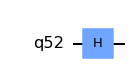

In [22]:
# H gate in quantum circuit
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.h(q)
display(qc.draw(output="mpl"))

In [23]:
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

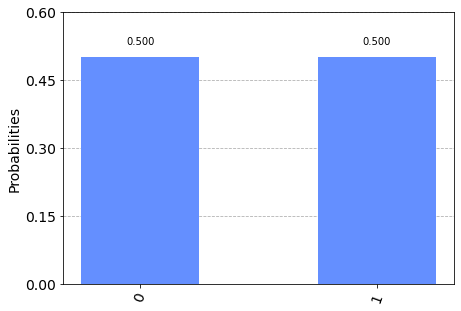

In [24]:
# probability of output state
counts = result.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)

#### Application by Example

#### Example 1
<center><b>Applying H gate on |0></b></center>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$

$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}= \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$

$$H\ket{0} = \ket{+}$$

In [25]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("|0> \n{}\n".format(zero_state))

h_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
h_gate = np.matrix(h_gate)
print("H Gate \n{}\n".format(h_gate))

output = h_gate*zero_state
print("Applying H gate on 0 ket gives \n{}\n which is equal to |+>".format(output))

|0> 
[[1.+0.j]
 [0.+0.j]]

H Gate 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]

Applying H gate on 0 ket gives 
[[0.707+0.j]
 [0.707+0.j]]
 which is equal to |+>


#### Example 2 
<center><b>Applying H gate on |1></b></center>
$$H\ket{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 0 \\ 1\end{bmatrix}$$

$$H\ket{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix} = \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} - \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$

$$H\ket{1} = \ket{-}$$
<br/>

In [26]:
one_state = np.matrix([[0.+0.j],[1.+0.j]])
print("|1> \n{}\n".format(one_state))

h_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
h_gate = np.matrix(h_gate)
print("H Gate \n{}\n".format(h_gate))

output = h_gate*one_state
print("Applying H gate on 1 ket gives \n{}\n which is equal to |->".format(output))

|1> 
[[0.+0.j]
 [1.+0.j]]

H Gate 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]

Applying H gate on 1 ket gives 
[[ 0.707+0.j]
 [-0.707+0.j]]
 which is equal to |->


<center><b>Hermitian</b></center>
<center><b>When a gate is equivalent to its conjugate transpose</b></center>

$$H^\dagger =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}$$

$$H = H^\dagger$$
<center><b>H gate is Hermitian</b></center>
<br/>
<center><b>Unitary</b></center>
<center><b>When product of a gate and its conjugate transpose is equal to identity matrix, </b></center>
<center><b>conjugate transpose acts as inverse of the gate</b></center>
<br/>
$$HH^\dagger = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}$$

$$HH^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

$$HH^\dagger = I$$

<center><b>H gate is Unitary</b></center>

$$H^\dagger=H^{-1}$$
$$We\space know,\space H = H^\dagger$$
<center><b>So H is inverse of itself</b></center>

#### Hermitian and Unitary check

In [27]:
check_hermitian(z_gate)
check_unitary(z_gate)

It is Hermitian
It is Unitary


<center><b>Derivation</b></center>
$$H = \ket{+}\bra{0} + \ket{-}\bra{1}$$ 

<center>( Equation from eigenvectors and corresponding eigenvalues )</center>

$$H = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})\bra{0} + \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})\bra{1}$$

$$H = \frac{1}{\sqrt{2}}(\ket{0}\bra{0} + \ket{1}\bra{0} + \ket{0}\bra{1} - \ket{1}\bra{1})$$

$$H = \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix}\begin{bmatrix} 1 & 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}\begin{bmatrix} 1 & 0\end{bmatrix} + \begin{bmatrix} 1 \\ 0\end{bmatrix}\begin{bmatrix} 0 & 1\end{bmatrix} - \begin{bmatrix} 0 \\ 1\end{bmatrix}\begin{bmatrix} 0 & 1\end{bmatrix})$$

$$H = \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 &  0 \\ 0 & 0\end{bmatrix} + \begin{bmatrix} 0 &  0 \\ 1 & 0\end{bmatrix} + \begin{bmatrix} 0 &  1 \\ 0 & 0\end{bmatrix} - \begin{bmatrix} 0 &  0 \\ 0 & 1\end{bmatrix}) $$

$$H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}$$
<br/>

### Changing measurement basis to x and y from z
#### To measure in other basis rather than the default computational basis of Z, we can apply H gate to measure in X basis. we know that H converts $\ket{0}$ to $\ket{+}$ and $\ket{1}$ to $\ket{-}$
$\ket{+} = \frac{\ket{0} + \ket{1}}{\sqrt{2}}$
$\ket{-} = \frac{\ket{0} - \ket{1}}{\sqrt{2}}$
From these 2 equations we get
$\ket{0} = \frac{\ket{+} + \ket{-}}{\sqrt{2}}$
$\ket{1} = \frac{\ket{+} - \ket{1}}{\sqrt{2}}$

Let $\ket{q}$ = a$\ket{0}$ + b$\ket{1}$

$\ket{q}$ in x basis is $\ket{q} = \frac{(a+b)\ket{+}}{\sqrt{2}} + \frac{(a-b)\ket{-}}{\sqrt{2}}$

So Probability of the qubit to collapse into $\ket{+}$ after measurement is $\frac{(a+b)^{2}}{2}$

So Probability of the qubit to collapse into $\ket{-}$ after measurement is $\frac{(a-b)^{2}}{2}$

Similarly we can convert the measurement basis to y axis, we know H transforms from z to x axis, then we can move from x to y axis using S Gate.

#### From x to y basis: S
#### From z to x basis: H
#### From z to y basis: H then S

### Heisenberg’s famous uncertainty principle
Measuring in different bases exemplifies the Heisenberg’s famous uncertainty principle, having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the X-basis, and vice versa. This isn't due to the limits in our equipment, the uncertainty is the nature of the qubit.

For example, if we put our qubit in the state $\ket{0}$, our measurement in the Z-basis is 100% to be $\ket{0}$, but our measurement in the X-basis is random because both $\ket{+}$ and $\ket{-}$ are equally likely to be $\ket{0}$ or $\ket{1}$.

Similarly, if we put our qubit in the state $\ket{+}$, our measurement in the X-basis is certain to be $\ket{+}$, but now any measurement in the Z-basis will be random beacause $\ket{+}$ is in a superposition such that the Probability of measuring $\ket{0}$ or $\ket{1}$ are both 50%.